### Exercise 1 <br>
Familiarize yourself with the heights data set provided with the modelr package.

In [ ]:
install.packages("modelr")

In [1]:
library(tidyverse)
library(modelr)

── Attaching packages ─────────────────────────────────────────────────────────────────────────────── tidyverse 1.3.1 ──

✔ ggplot2 3.3.6     ✔ purrr   0.3.4
✔ tibble  3.1.7     ✔ dplyr   1.0.9
✔ tidyr   1.2.0     ✔ stringr 1.4.0
✔ readr   2.1.2     ✔ forcats 0.5.1

── Conflicts ────────────────────────────────────────────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()



In [ ]:
installed.packages()

In [2]:
sessionInfo()

R version 4.2.0 (2022-04-22 ucrt)
Platform: x86_64-w64-mingw32/x64 (64-bit)
Running under: Windows 10 x64 (build 19044)

Matrix products: default

locale:
[1] LC_COLLATE=English_United States.utf8 
[2] LC_CTYPE=English_United States.utf8   
[3] LC_MONETARY=English_United States.utf8
[4] LC_NUMERIC=C                          
[5] LC_TIME=English_United States.utf8    

attached base packages:
[1] stats     graphics  grDevices utils     datasets  methods   base     

other attached packages:
 [1] modelr_0.1.8    forcats_0.5.1   stringr_1.4.0   dplyr_1.0.9    
 [5] purrr_0.3.4     readr_2.1.2     tidyr_1.2.0     tibble_3.1.7   
 [9] ggplot2_3.3.6   tidyverse_1.3.1

loaded via a namespace (and not attached):
 [1] pbdZMQ_0.3-7     tidyselect_1.1.2 repr_1.1.4       haven_2.5.0     
 [5] colorspace_2.0-3 vctrs_0.4.1      generics_0.1.2   htmltools_0.5.2 
 [9] base64enc_0.1-3  utf8_1.2.2       rlang_1.0.2      pillar_1.7.0    
[13] glue_1.6.2       withr_2.5.0      DBI_1.1.2        dbplyr_2.1.

In [3]:
ls("package:modelr") 

[1] "%>%"                  "add_predictions"      "add_predictors"      
 [4] "add_residuals"        "bootstrap"            "crossv_kfold"        
 [7] "crossv_loo"           "crossv_mc"            "data_grid"           
[10] "fit_with"             "formulae"             "formulas"            
[13] "gather_predictions"   "gather_residuals"     "geom_ref_line"       
[16] "heights"              "mae"                  "mape"                
[19] "model_matrix"         "mse"                  "na.warn"             
[22] "permute"              "permute_"             "qae"                 
[25] "resample"             "resample_bootstrap"   "resample_partition"  
[28] "resample_permutation" "rmse"                 "rsae"                
[31] "rsquare"              "seq_range"            "sim1"                
[34] "sim2"                 "sim3"                 "sim4"                
[37] "spread_predictions"   "spread_residuals"     "typical"

In [4]:
head(heights)

income,height,weight,age,marital,sex,education,afqt
<int>,<dbl>,<int>,<int>,<fct>,<fct>,<int>,<dbl>
19000,60,155,53,married,female,13,6.841
35000,70,156,51,married,female,10,49.444
105000,65,195,52,married,male,16,99.393
40000,63,197,54,married,female,14,44.022
75000,66,190,49,married,male,14,59.683
102000,68,200,49,divorced,female,18,98.798


### Exercise 2 <br>
Create a list of formulas for modeling income with:
(*height)
(*height * weight)
(*linear combination of all variables)

Formula 1: Income and height

In [5]:
incomeHeight <- lm(income ~ height, data=heights)
incomeHeight


Call:
lm(formula = income ~ height, data = heights)

Coefficients:
(Intercept)       height  
    -158888         2982  


Formula 2: Income with height*weight

In [6]:
incomeHeightWeight <- lm(income ~ height*weight, data=heights)
incomeHeightWeight


Call:
lm(formula = income ~ height * weight, data = heights)

Coefficients:
  (Intercept)         height         weight  height:weight  
   -2.075e+05      3.933e+03      1.044e+02     -2.741e+00  


Formula 3: income with all varaibles

In [7]:
incomeAllVars <- lm(income ~ height + weight + age + marital + sex + education + afqt, data = heights)
incomeAllVars


Call:
lm(formula = income ~ height + weight + age + marital + sex + 
    education + afqt, data = heights)

Coefficients:
     (Intercept)            height            weight               age  
       -44409.17            293.26            -22.62           -401.81  
  maritalmarried  maritalseparated   maritaldivorced    maritalwidowed  
        14204.65           3364.49           5586.83          10663.36  
       sexfemale         education              afqt  
       -24815.77           5944.87            389.42  


### Exercise 3 <br>
From the data, remove rows containing NA’s. Fit the linear model with the formulas from exercise 2.

In [8]:
na.omit(heights)

income,height,weight,age,marital,sex,education,afqt
<int>,<dbl>,<int>,<int>,<fct>,<fct>,<int>,<dbl>
19000,60,155,53,married,female,13,6.841
35000,70,156,51,married,female,10,49.444
105000,65,195,52,married,male,16,99.393
40000,63,197,54,married,female,14,44.022
75000,66,190,49,married,male,14,59.683
102000,68,200,49,divorced,female,18,98.798
0,74,225,48,married,male,16,82.260
70000,64,160,54,divorced,female,12,50.283
60000,69,162,55,divorced,male,12,89.669


### Fitting the linear models

Formula 1: Income and Height

In [9]:
incomeHeight.lm <- lm(formula=incomeHeight, data = heights)
summary(incomeHeight.lm)


Call:
lm(formula = incomeHeight, data = heights)

Residuals:
   Min     1Q Median     3Q    Max 
-91583 -31511 -10893  14882 320828 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) -158888.1    10733.8  -14.80   <2e-16 ***
height         2981.8      159.7   18.68   <2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 54550 on 7004 degrees of freedom
Multiple R-squared:  0.04744,	Adjusted R-squared:  0.0473 
F-statistic: 348.8 on 1 and 7004 DF,  p-value: < 2.2e-16


Formula 2: Income, Weight*Height

In [10]:
incomeHeightWeight.lm <- lm(formula = incomeHeightWeight, data=heights)
summary(incomeHeightWeight.lm )


Call:
lm(formula = incomeHeightWeight, data = heights)

Residuals:
   Min     1Q Median     3Q    Max 
-99489 -30769 -10942  14840 322691 

Coefficients:
                Estimate Std. Error t value Pr(>|t|)    
(Intercept)   -2.075e+05  4.488e+04  -4.622 3.87e-06 ***
height         3.933e+03  6.747e+02   5.829 5.84e-09 ***
weight         1.044e+02  2.288e+02   0.456    0.648    
height:weight -2.741e+00  3.386e+00  -0.809    0.418    
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 54720 on 6907 degrees of freedom
  (95 observations deleted due to missingness)
Multiple R-squared:  0.05086,	Adjusted R-squared:  0.05045 
F-statistic: 123.4 on 3 and 6907 DF,  p-value: < 2.2e-16


Formula 3: Income and all variables

In [11]:
incomeAllVars.lm<-lm(formula=incomeAllVars, data = heights)

summary(incomeAllVars.lm)


Call:
lm(formula = incomeAllVars, data = heights)

Residuals:
    Min      1Q  Median      3Q     Max 
-115521  -25139   -5477   14904  326890 

Coefficients:
                  Estimate Std. Error t value Pr(>|t|)    
(Intercept)      -44409.17   20565.27  -2.159  0.03085 *  
height              293.26     227.77   1.288  0.19796    
weight              -22.62      15.41  -1.468  0.14227    
age                -401.81     270.53  -1.485  0.13753    
maritalmarried    14204.65    1754.67   8.095 6.74e-16 ***
maritalseparated   3364.49    3055.37   1.101  0.27086    
maritaldivorced    5586.83    1990.67   2.807  0.00502 ** 
maritalwidowed    10663.36    4290.03   2.486  0.01296 *  
sexfemale        -24815.77    1744.56 -14.225  < 2e-16 ***
education          5944.87     289.14  20.561  < 2e-16 ***
afqt                389.42      26.52  14.685  < 2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 49100 on 6634 degrees of freedom
  (361

Exercise 4
For each fit, calculate RMSE.

In [12]:
# Root mean square error (RMSE)
# Formula 1
rmse(incomeHeight.lm, data=heights)

[1] 54546.47

In [13]:
# Formula 2
rmse(incomeHeightWeight.lm, data=heights)

[1] 54706.7

In [14]:
# Formula 3
rmse(incomeAllVars.lm, data=heights)

[1] 49056.82

Exercise 5
For each model, add residuals to the data and plot their distribution. (Hint: use lift_dl().)

In [22]:
res1 <- resid(incomeHeight.lm )
head(res1)

1         2         3         4         5         6 
 -1020.19 -14838.23  70070.79  11034.40  37088.98  58125.38

Income and height distribution with residuals

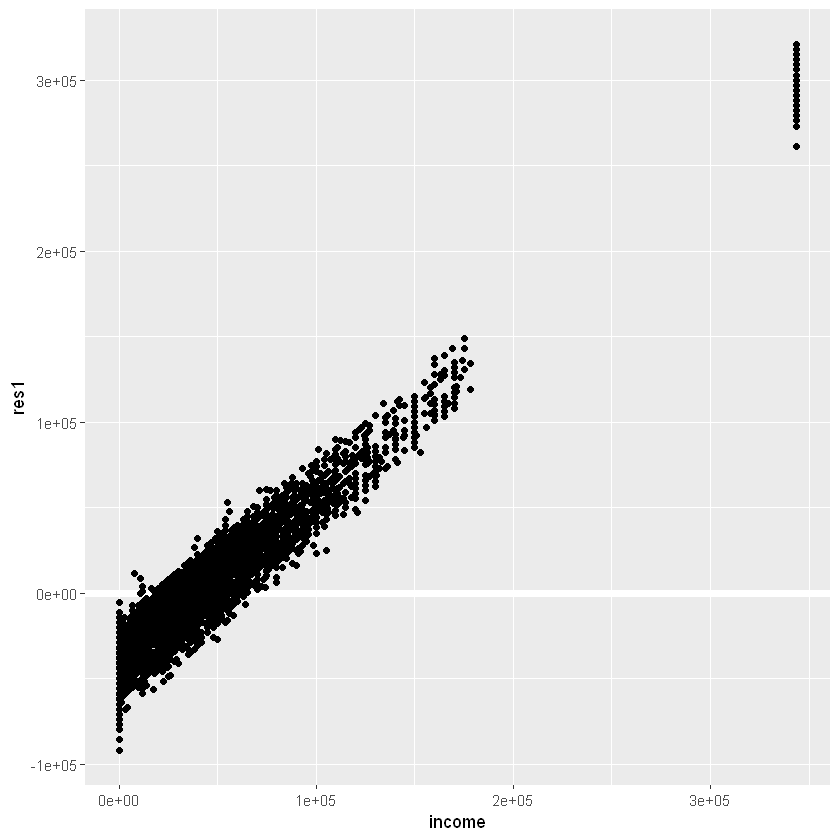

In [16]:
ggplot(incomeHeight.lm, aes(income,res1)) + geom_ref_line(h=0) + geom_point()

Income, height, and weight distrubtion with residuals

In [23]:
res2 = resid(incomeHeightWeight.lm )
head(res2)

1           2           3           4           5           6 
  -200.7111 -19192.0589  71210.3398  13143.3846  37429.5849  58425.5330

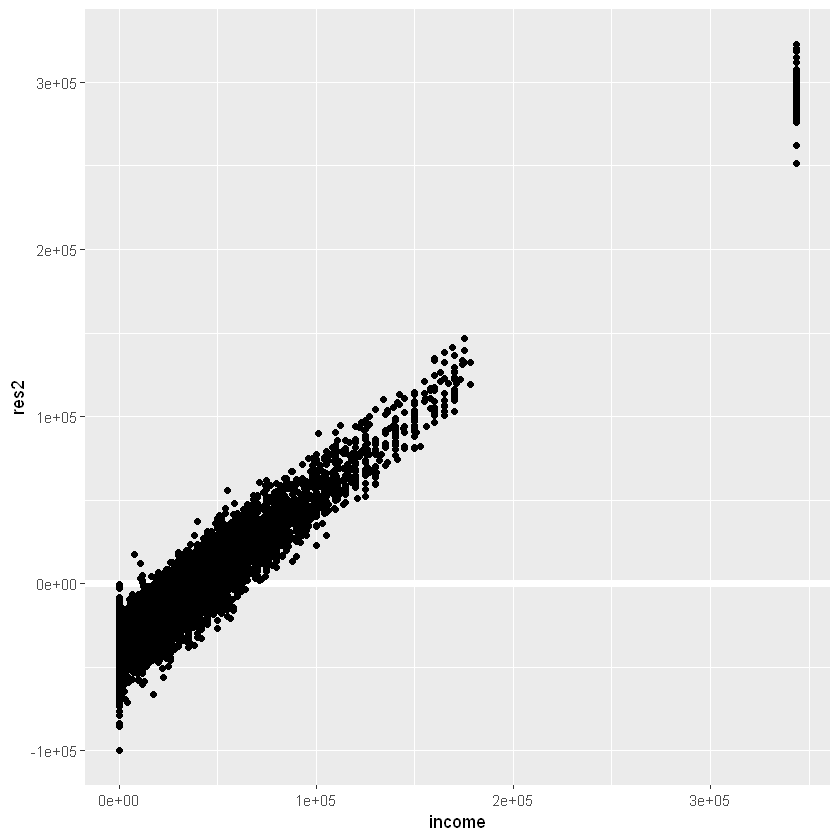

In [18]:
ggplot(incomeHeightWeight.lm, aes(income,res2)) + geom_ref_line(h=0) + geom_point()

Distrubtion with residuals for all variables (Income, height, weight, age, marital status, sex,  
    education, afqt)

In [24]:
res3 = resid(incomeAllVars.lm)
head(res3)

1         2         3         4         5         6 
 1278.523 14809.144  7623.239  2326.580  3364.989 24426.635

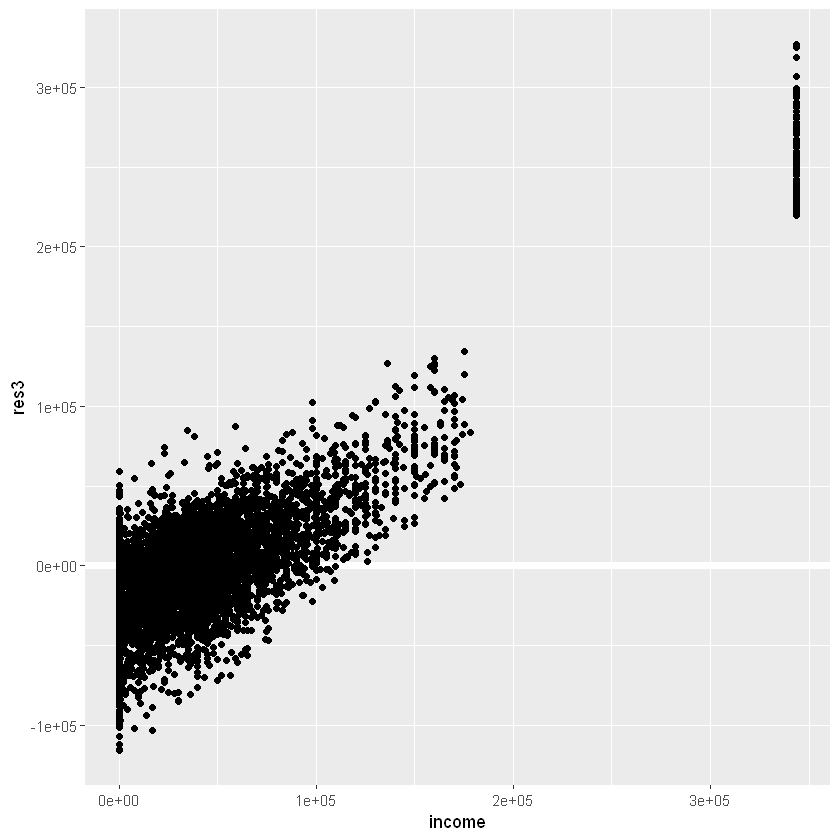

In [20]:
ggplot(incomeAllVars.lm, aes(income,res3)) + geom_ref_line(h=0) + geom_point()